In [19]:
import cv2 
import os 
import glob
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import tensorflow as tf

# Function used later for plotting

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


# Choose the dataset (easy, medium or hard)

In [21]:
flag = 0 # 0=easy, 1=medium, 2=hard 

if flag == 0:
    dataset ='easy'
    test_label = ['Bag', 'Dress', 'Trouser', 'Sneaker', 'T-shirt/top']
elif flag == 1: 
    dataset = 'medium'
    test_label = ['Ankle boot', 'Coat', 'Pullover', 'Sandal', 'Shirt']
elif flag == 2:
    dataset = 'hard'
    test_label = ['Ankle boot', 'Bag', 'Dress', 'Trouser', 'T-shirt/top']
else:
    print("Dataset not present")
path = os.getcwd() + "\\" + dataset + "\\" + "*.jpg"
test_img = glob.glob(path)
for each in range(len(test_label)):
    test_label[each] = class_names.index(test_label[each]) #usefull later for plotting

# Here the greyscale and the resize is done 


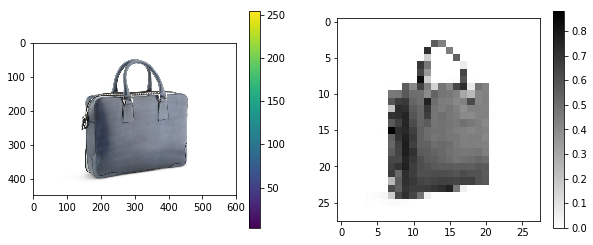

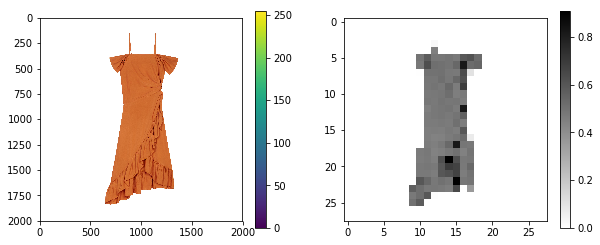

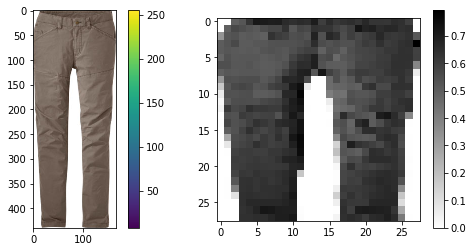

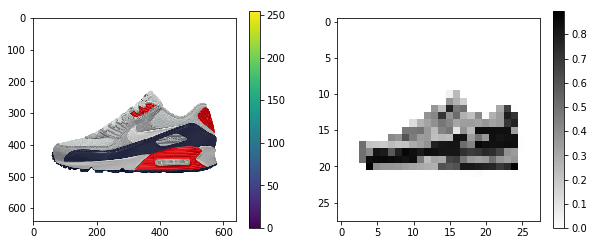

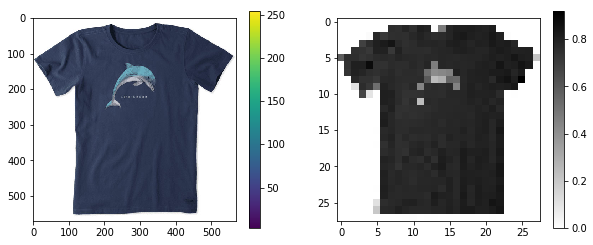

In [22]:
testSet = []
for each in test_img:
    img = cv2.imread(each) #reading of the image
    
    #For visualization
    plt.figure(figsize=(10,4))
    
    size = (28, 28) # size of the input for the CNN
    img_g = cv2.resize(img, size)  # resize of the image
    img_g = cv2.bitwise_not(img_g)
    img_g = cv2.cvtColor(img_g, cv2.COLOR_BGR2GRAY) / 255 # greyscale
    testSet.append(img_g)
    
    plt.subplot(1,2,1)
    # used to show the original image
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.colorbar()
    plt.grid(False)
    
    #For visualization
    plt.subplot(1,2,2)
    plt.imshow(img_g,  cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.show()   
    
testSet = np.array(testSet) #normalization of the images
IMG_X, IMG_Y = size
testSet = testSet.reshape(testSet.shape[0], IMG_X, IMG_Y, 1) #reshape needed for fetch it to the CNN input

# Model of the CNN + NN and weights load

In [23]:
input_shape = (IMG_X, IMG_Y, 1)
model = keras.Sequential([
    #structure 1 --> 92.5 val accuracy
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same',input_shape=input_shape),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    keras.layers.Dropout(0.6),
    
    keras.layers.Conv2D(128, kernel_size=(2, 2), activation='relu'), 
    keras.layers.Conv2D(128, kernel_size=(2, 2), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=1),
    keras.layers.Dropout(0.6),
    
    keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    keras.layers.Conv2D(512, kernel_size=(4, 4), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=1),
    keras.layers.Dropout(0.8),
    
    keras.layers.Flatten(name='final'),
    keras.layers.Dense(256),
    keras.layers.BatchNormalization(),
    keras.layers.Activation(tf.nn.relu),
    keras.layers.Dense(128),
    keras.layers.BatchNormalization(),
    keras.layers.Activation(tf.nn.relu),
    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.Activation(tf.nn.relu),
    keras.layers.Dense(32),
    keras.layers.BatchNormalization(),
    keras.layers.Activation(tf.nn.relu),
    keras.layers.Dense(10),
    keras.layers.BatchNormalization(),
    keras.layers.Activation(tf.nn.softmax)
])

model.load_weights('total_model.h5')

# Prediction 

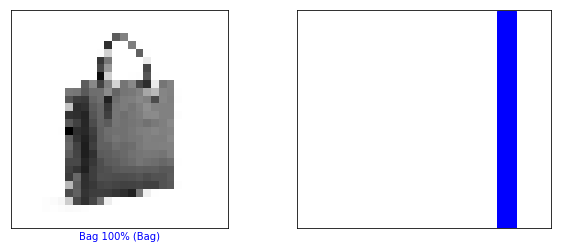

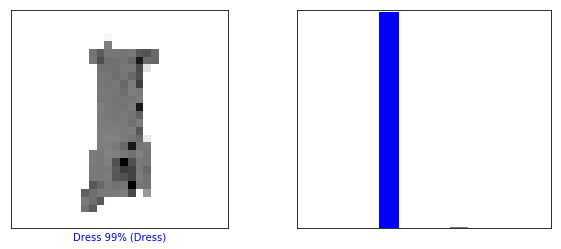

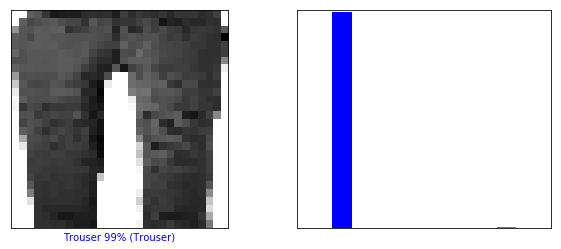

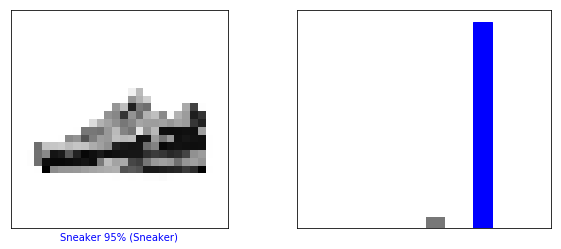

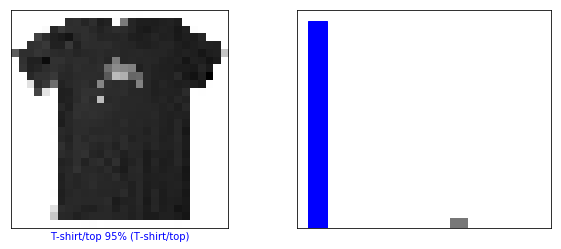

In [24]:
predictions = model.predict(testSet)
testSet = np.squeeze(testSet) # we need to remove the dimension of the batch in order to plot the data
for each in range(len(testSet)):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plot_image(each, predictions, test_label, testSet)
    plt.subplot(1,2,2)
    plot_value_array(each, predictions,  test_label)
    plt.show()